In [1]:
# A Time Series is defined as a series of data points indexed in time order. The time order can be daily, monthly, or even yearly.

# Time Series Forecasting
# Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

# Some Use Cases
# 1) To predict the number of incoming or churning customers.
# 2) To explaining seasonal patterns in sales.
# 3) To detect unusual events and estimate the magnitude of their effect.
# 4) To Estimate the effect of a newly launched product on number of sold units.

# Components of a Time Series:
# Trend:
# The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

# Seasonality:
# The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions, or an increase in the number of airline passengers during holidays each year.

# Cyclical Component: 
# These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.

# Irregular Variation: 
# These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

# ETS Decomposition:
# ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.

In [2]:
#ETS Decomposition of Airline Passengers Dataset

In [3]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

# Read the AirPassengers dataset 
airline = pd.read_csv(r'C:\Users\mackrish_malik\Desktop\MLE PROJECTS\AirPassengers.csv', 
                      index_col='Month', 
                      parse_dates=True)


# Print the first five rows of the dataset 
print(airline.head()) 

# ETS Decomposition 
result = seasonal_decompose(airline['#Passengers'], 
                            model='multiplicative') 

# ETS plot 
result.plot() 
plt.show()


In [39]:
# Parameter Analysis for the ARIMA model

In [9]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima
import warnings 

# Ignore harmless warnings 
warnings.filterwarnings("ignore") 

# Read the AirPassengers dataset 
airline = pd.read_csv(r'C:\Users\mackrish_malik\Desktop\MLE PROJECTS\AirPassengers.csv', 
                      index_col='Month', 
                      parse_dates=True)

# Print the first five rows of the dataset 
print(airline.head()) 

# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(airline['#Passengers'], 
                          start_p=1, start_q=1, 
                          max_p=3, max_q=3, m=12, 
                          start_P=0, seasonal=True, 
                          d=None, D=1, trace=True, 
                          error_action='ignore', 
                          suppress_warnings=True, 
                          stepwise=True) 

# To print the summary 
print(stepwise_fit.summary()) 


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.43 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.53 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.60 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.83 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time

In [ ]:
# Fit ARIMA Model to AirPassengers dataset

In [19]:
# Split data into train / test sets 
train = airline.iloc[:len(airline)-12] 
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing 

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['#Passengers'], 
				order = (0, 1, 1), 
				seasonal_order =(2, 1, 1, 12)) 

result = model.fit() 
result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.011
Date:                            Fri, 30 Aug 2024   AIC                            896.022
Time:                                    09:44:36   BIC                            909.918
Sample:                                01-01-1949   HQIC                           901.665
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.076     -3.945      0.000      -0.447      -0.150
ar.S.L12       0.7100      0.234      3.032      0.002       0.251       1.169
ar.S.L24       0.2894      0.100      2.901      0.004       0.094       0.485
ma.S.L12      -0.9829      2.626     -0.374      0.708      -6.129       4.163
sigma2        88.0415    211.343      0.417      0.677    -326.183     502.266
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Predictions of ARIMA Model against the test set

<Axes: xlabel='Month'>

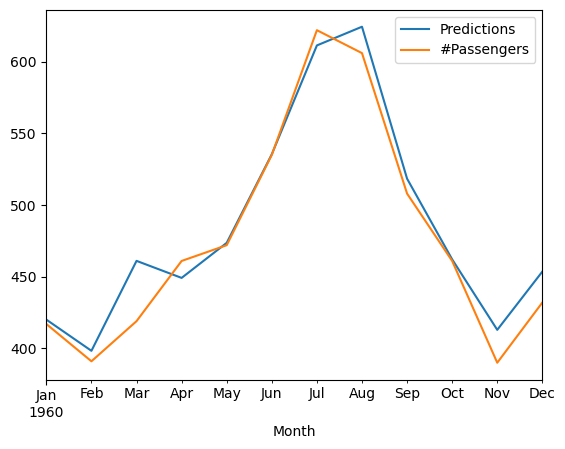

In [25]:
start = len(train) 
end = len(train) + len(test) - 1

# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
							typ = 'levels').rename("Predictions") 

# plot predictions and actual values 
predictions.plot(legend = True) 
test['#Passengers'].plot(legend = True) 


In [27]:
# Evaluate the model using MSE and RMSE

In [31]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# Calculate root mean squared error 
rmse(test["#Passengers"], predictions) 

# Calculate mean squared error 
mean_squared_error(test["#Passengers"], predictions) 


294.0488415389431

In [33]:
# Forecast using ARIMA Model

<Axes: xlabel='Month'>

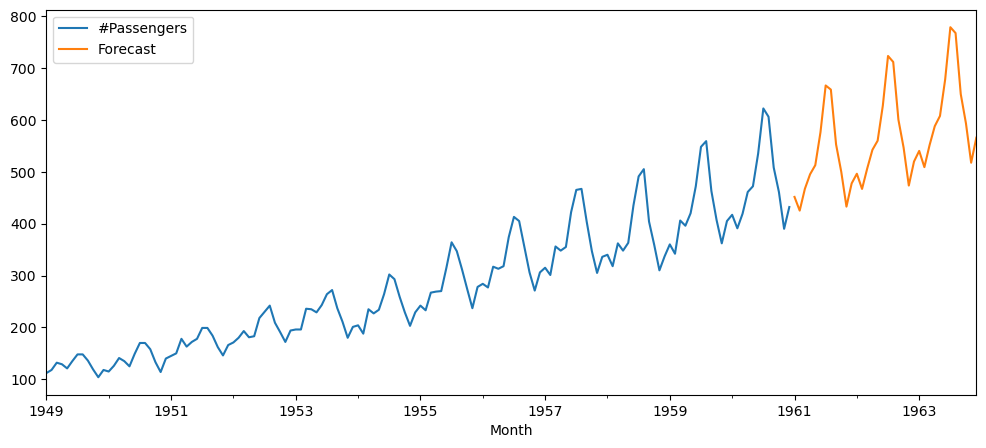

In [35]:
# Train the model on the full dataset 
model = model = SARIMAX(airline['#Passengers'], 
						order = (0, 1, 1), 
						seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 

# Forecast for the next 3 years 
forecast = result.predict(start = len(airline), 
						end = (len(airline)-1) + 3 * 12, 
						typ = 'levels').rename('Forecast') 

# Plot the forecast values 
airline['#Passengers'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 
